# How to numerically calculate the area of a circle
We can numerically calculate the area of a circle using an integral. We integrate the function 2\*Pi\*r in the interval from 0 to R, where R is the circle's radius. We will see how this is interpreted visually.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Integral Calculation
Standard implementation of the integral's numerical computation, using the [Trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule).

In [2]:
def calculate_integral(f, a, b, n):
    '''Calculates the integral based on the composite trapezoidal rule
    relying on the Riemann Sums.
    
    :param function f: the integrand function
    :param int a: lower bound of the integral
    :param int b: upper bound of theintergal
    :param int n: number of trapezoids of equal width
    :return float: the integral of the function f between a and b
    '''
    w = (b - a)/n
    x = np.linspace(a,b,n+1)
    x_mid = (x[:-1] + x[1:])/2
    result = np.sum(f(x_mid)*w)
    return result

## Define the integration function

In [3]:
R = 8  # circle's radius
a, b = 0, R # integral's limits

f = lambda r: 2*np.pi*r  # function to integrate

N = 400  # number of points to generate for a smoother function
X = np.linspace(a, b, N + 1)  # x-points of the smoother function
Y = f(X)  # the functions itself

## Create an animation
We will create an animation composed of two subplots. On the left subplot, we will animate the partition of the circle. On the right we will demonstrate how this partition reflects in the integration process.

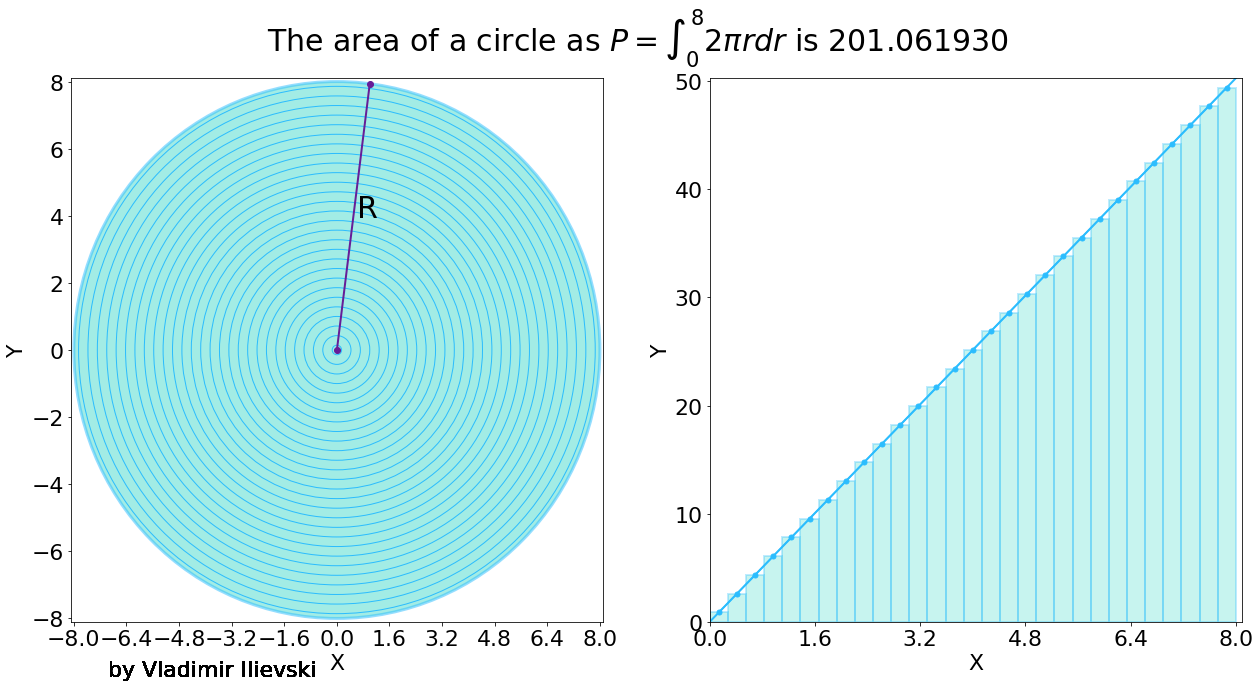

In [4]:
# define the axes objects
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(21, 10))

def animate(i):
    # plt.cla()  # clear all previous axes objects
    axs[0].clear()
    axs[1].clear()
    
    # common formatting options
    for j in range(2):
        axs[j].set_xlabel('X', fontsize=22)
        axs[j].set_ylabel('Y', fontsize=22)
        axs[j].tick_params(labelsize=22)

    # formatting options for the left subplot
    axs[0].set_xlim((-R - 0.1, R + 0.1))
    axs[0].set_ylim((-R - 0.1, R + 0.1))
    axs[0].set_xticks(np.linspace(-R, R, 11))

    # formatting options for the left subplot
    axs[1].set_xlim((0, R + 0.1))
    axs[1].set_ylim((0, 2 * np.pi * R))
    axs[1].set_xticks(np.linspace(0, R, 6))
    
    # draw circle in the left subplot
    circle = plt.Circle(xy=(0, 0), radius=R, fill=True, fc='#47DBCD', ec='#2CBDFE', lw=3, alpha=0.5)
    circle = axs[0].add_artist(circle)

    # draw the radius in the circle
    x_coord = 1.
    axs[0].plot([0, x_coord], [0, np.sqrt(R**2 - x_coord**2)], c='#661D98', marker='o', lw=2)
    axs[0].text(x_coord/2 + 0.1, np.sqrt(R**2 - x_coord**2)/2, 'R', fontsize=30)
    
    num_trapezoids = i + 2  # the number of trapezoids
    
    x = np.linspace(0, R, num_trapezoids + 1)  # partitions of the radius
    y = f(x)  # values at those partitions
    x_mid = (x[:-1] + x[1:])/2  # mid points
    y_mid = f(x_mid)  # values at those mid points
    
    r = np.linspace(0, R, num_trapezoids)  # partitions in the circle
    r_mid = (r[:-1] + r[1:])/2
    
    # draw the partitions of the circle
    for rr in r_mid:
        axs[0].add_artist(plt.Circle(xy=(0, 0), radius=rr, fill=False, ec='#2CBDFE', lw=1, linestyle='-'))
    
    # draw the function 2*pi*r in the right subplot
    line, = axs[1].plot(X, Y, color='#2CBDFE', lw=2)
    
    # plot the mid points
    axs[1].plot(x_mid, y_mid, c='#2CBDFE', marker='.', markersize=10)
    
    # draw the bar lines
    bar = axs[1].bar(x_mid, y_mid, width=1.0*(b-a)/num_trapezoids, alpha=0.3, align='center', color='#47DBCD', edgecolor='#2CBDFE', lw=2)
    
    y_int = calculate_integral(f, a, b, num_trapezoids)  # calculate the integral
    
    fig.suptitle('The area of a circle as $P = \int_{{0}}^{{8}}2\pi rdr$ is {0:.6f}'.format(y_int), fontsize=30)
    plt.gcf().text(0.15, 0.05, 'by Vladimir Ilievski', fontsize=22)
    
    return bar

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=28, interval=500, blit=True)
anim.save('area_of_circle.gif',writer="imagemagick")